# Beans classification
The data comes from the analysis of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. A total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.

KOKLU, M. and OZKAN, I.A., (2020), “Multiclass Classification of Dry Beans Using Computer Vision and Machine Learning Techniques.” Computers and Electronics in Agriculture, 174, 105507. DOI: https://doi.org/10.1016/j.compag.2020.105507

## 1. Main objective

The analysis intends to classify the beans in different clusters.


## 2. Dataset description

The dataset contains the following variables:

1. Area (A): The area of a bean zone and the number of pixels within its boundaries.
2. Perimeter (P): Bean circumference is defined as the length of its border.
3. Major axis length (L): The distance between the ends of the longest line that can be drawn from a bean.
4. Minor axis length (l): The longest line that can be drawn from the bean while standing perpendicular to the main axis.
5. Aspect ratio (K): Defines the relationship between L and l.
6. Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region.
7. Convex area (C): Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
8. Equivalent diameter (Ed): The diameter of a circle having the same area as a bean seed area.
9. Extent (Ex): The ratio of the pixels in the bounding box to the bean area.
10.Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
11.Roundness (R): Calculated with the following formula: (4piA)/(P^2)
12.Compactness (CO): Measures the roundness of an object: Ed/L
13.ShapeFactor1 (SF1)
14.ShapeFactor2 (SF2)
15.ShapeFactor3 (SF3)
16.ShapeFactor4 (SF4)
17.Class (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)

## 3. Data exploration

### 3.1. Importing data

In [1]:
# Import python packages to be used
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))

import os, seaborn as sns, pandas as pd, numpy as np, matplotlib.pyplot as plt
from pprint import pprint

In [2]:
# Import the data
dataset = pd.read_csv('data/Dry_Bean_Dataset.csv')
dataset

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610291.00,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638018.00,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.11,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645884.00,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620134.00,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759696.00,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757499.00,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759321.00,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763779.00,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


### 1.2. Checking for ranges and invalid values

In [3]:
COLUMNS = dataset.columns.tolist()
for c in COLUMNS:
    if dataset[c].isnull().values.any():
        print('{0}: {1} invalid values found'.format(c, dataset[c].isnull().sum()))
    else:
        print('{0}: ok'.format(c))

Area: ok
Perimeter: ok
MajorAxisLength: ok
MinorAxisLength: ok
AspectRation: ok
Eccentricity: ok
ConvexArea: ok
EquivDiameter: ok
Extent: ok
Solidity: ok
roundness: ok
Compactness: ok
ShapeFactor1: ok
ShapeFactor2: ok
ShapeFactor3: ok
ShapeFactor4: ok
Class: ok


In [4]:
dataset.dtypes

Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class               object
dtype: object

In [5]:
dataset.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,1.361100e+04,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,7.729110e+05,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,3.238848e+05,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,5.536000e+02,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,6.769955e+05,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,7.722730e+05,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,9.555000e+05,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1.921685e+06,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


No rows are incomplete. All columns have very different scales, so they will have to be normalized.

Let's see if the categories are balanced.

In [6]:
dataset.Class.value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

The categories are not very balanced. 

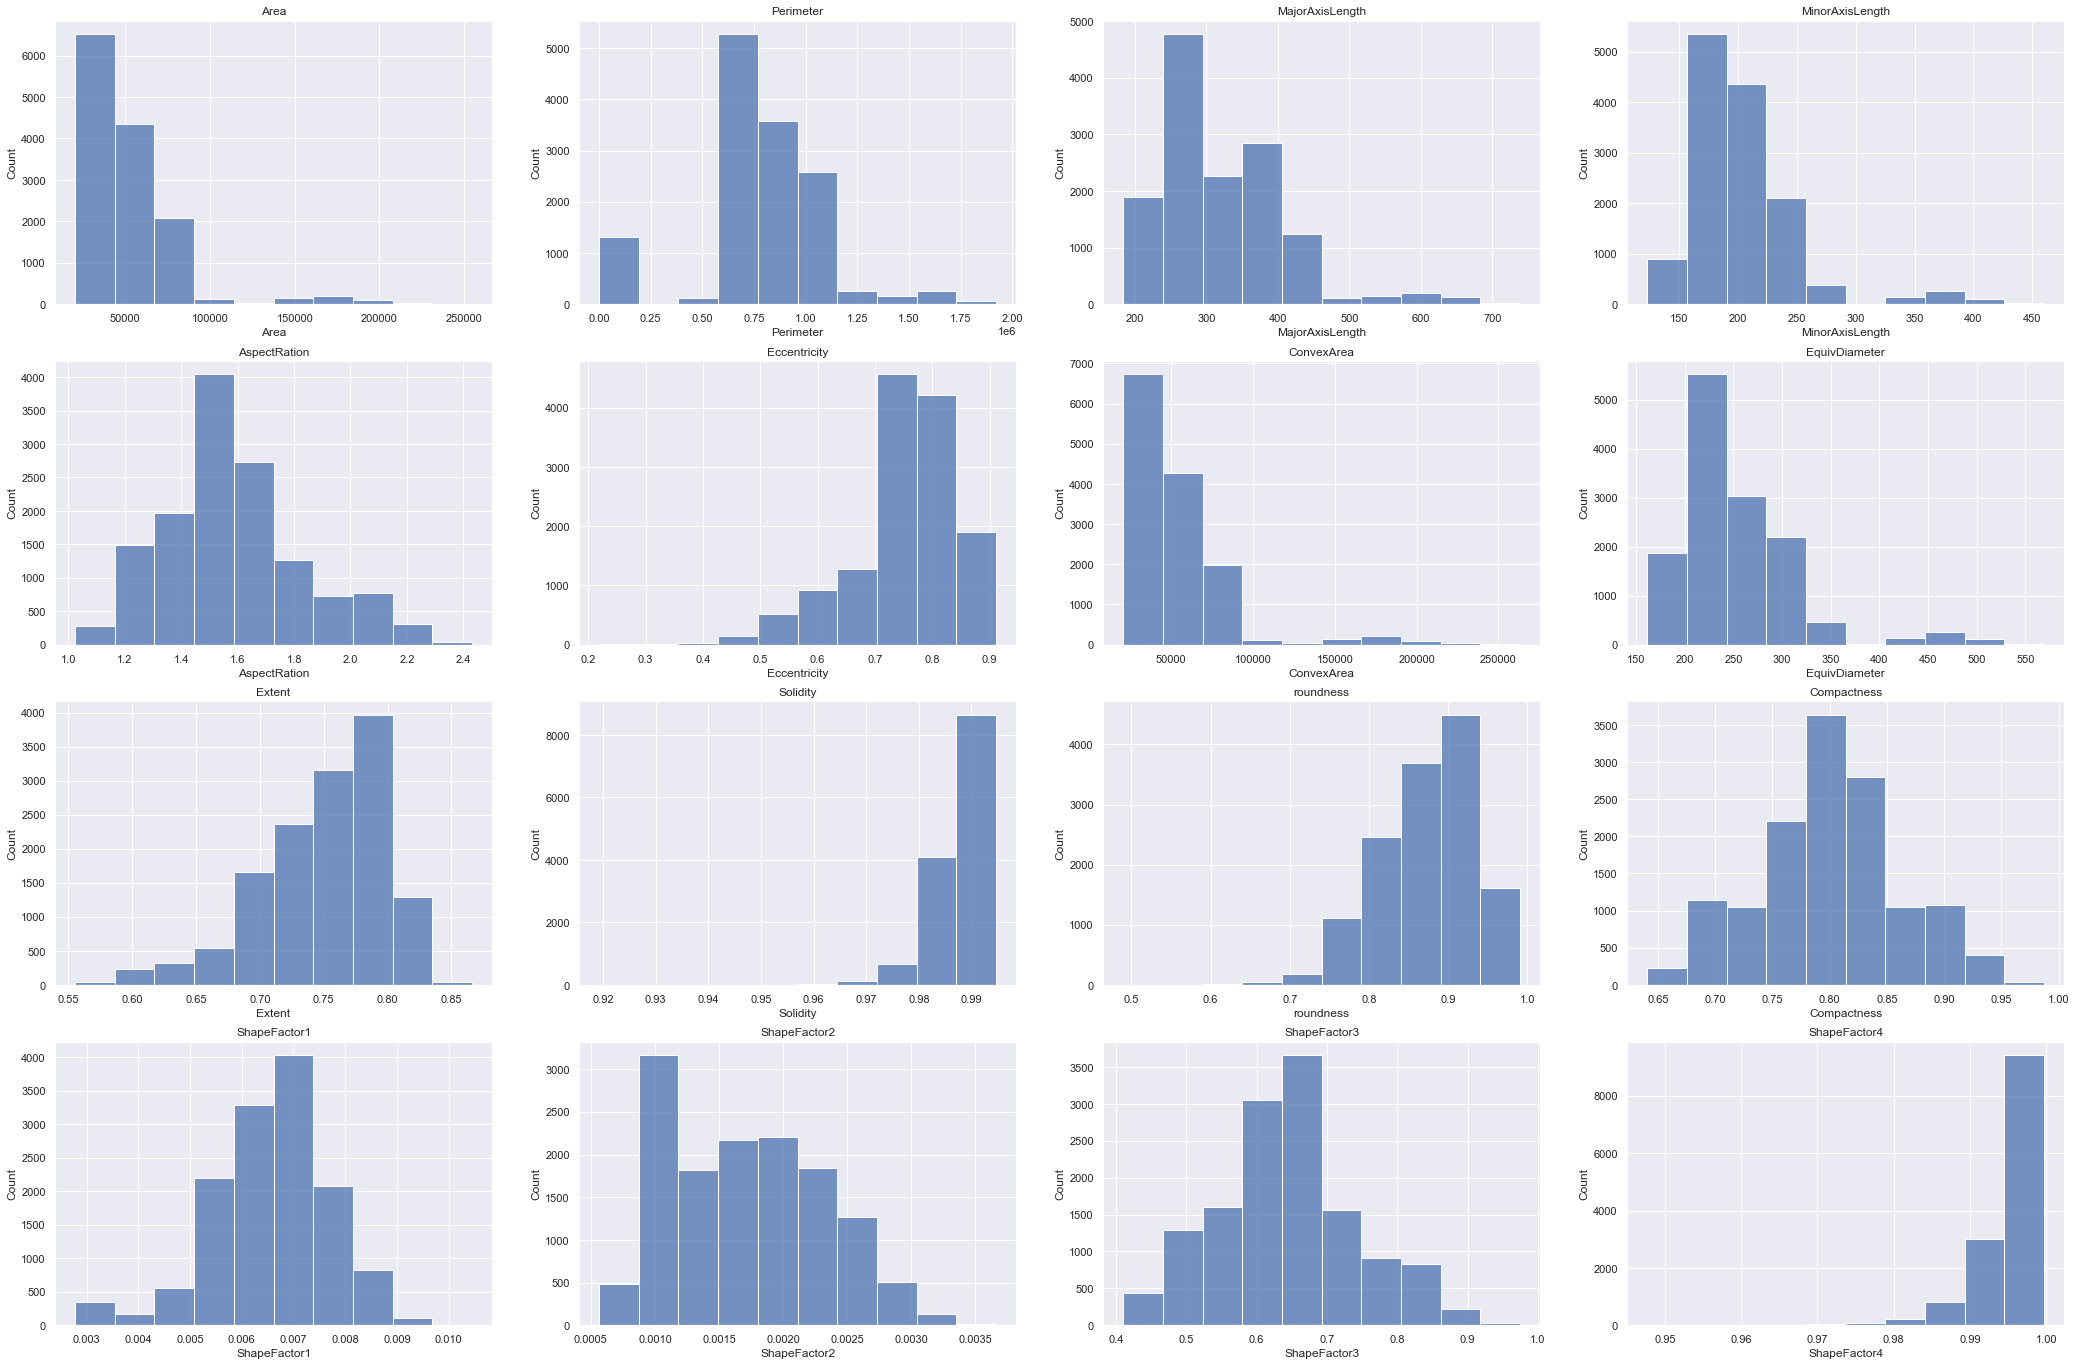

In [7]:
feature_cols = COLUMNS[:-1]
sns.set(style='darkgrid')
fig, ax_list = plt.subplots(nrows=4, ncols=4, sharey=False, figsize=(36,24))
ax_list = ax_list.flatten()
for name, ax in zip(feature_cols, ax_list):
     g = sns.histplot(dataset, x=name, bins=10, ax=ax).set(title=name)

There appear to be a few individuals whose height is considerably larger than the rest.

In [8]:
dataset.sort_values(['Solidity'], ascending=False)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
3370,137358,1364645.0,507.985890,345.222852,1.471472,0.733591,138093,418.198084,0.798073,0.994677,0.926882,0.823247,0.003698,0.001048,0.677736,0.997270,BOMBAY
4432,71282,1025671.0,399.781856,230.893019,1.731459,0.816357,71685,301.262446,0.831296,0.994378,0.851478,0.753567,0.005608,0.001116,0.567863,0.983232,CALI
4405,71014,1012162.0,401.813230,226.776061,1.771850,0.825514,71424,300.695582,0.668021,0.994260,0.871071,0.748347,0.005658,0.001095,0.560023,0.992276,CALI
1422,41923,731342.0,250.714385,213.018663,1.176960,0.527352,42167,231.036840,0.787286,0.994213,0.984966,0.921514,0.005980,0.002660,0.849188,0.999460,SEKER
1695,44515,757601.0,265.590470,213.967453,1.241266,0.592420,44780,238.071960,0.771745,0.994082,0.974620,0.896387,0.005966,0.002376,0.803510,0.997370,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6877,57783,970455.0,380.671967,201.902548,1.885424,0.847757,61035,271.240854,0.643134,0.946719,0.771008,0.712532,0.006588,0.001047,0.507701,0.957233,HOROZ
11907,32142,908265.0,243.527936,172.123401,1.414845,0.707422,33954,202.297962,0.723495,0.946634,0.489618,0.830697,0.007577,0.002225,0.690058,0.976325,DERMASON
5871,47542,876316.0,338.453506,186.822466,1.811632,0.833852,50332,246.033238,0.706335,0.944568,0.777975,0.726934,0.007119,0.001226,0.528433,0.957325,HOROZ
6305,52293,924252.0,364.877125,191.830415,1.902082,0.850645,55421,258.033943,0.661167,0.943559,0.769259,0.707180,0.006978,0.001076,0.500104,0.951239,HOROZ


There are also two individuals with height equal to zero. All four individuals will be pruned. While it is possible that there are very large individuals, these will interfere with the classification of the vast majority of the individuals. Doubts would still be cast because despite being so large, their other dimensions are significantly smaller than those of the next large individuals. As for those with zero height, this is possibly an errorof measurement.

In [9]:
# dataset = dataset.drop(dataset[ dataset['height'] == 0 ].index).drop(dataset[ dataset['height'] > 0.3 ].index)
# dataset = dataset.reset_index(drop=True)
# dataset.sort_values(['height'], ascending=False)

### 1.3. Encoding

Let's encode our class labels.

In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
dataset['Class'] = le.fit_transform(dataset.Class)
dataset['Class']

0        5
1        5
2        5
3        5
4        5
        ..
13606    3
13607    3
13608    3
13609    3
13610    3
Name: Class, Length: 13611, dtype: int32

Let us see if there is any correlation between variables.

### 1.4. Correlation

In [11]:
# Calculate the correlation values
feature_cols = dataset.columns
corr_values = dataset[feature_cols].corr()

# Simplify by emptying all the data below the diagonal
tril_index = np.tril_indices_from(corr_values)

# Make the unused values NaNs
for coord in zip(*tril_index):
    corr_values.iloc[coord[0], coord[1]] = np.NaN
    
# Stack the data and convert to a data frame
corr_values = (corr_values
               .stack()
               .to_frame()
               .reset_index()
               .rename(columns={'level_0':'feature1',
                                'level_1':'feature2',
                                0:'correlation'}))

# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()

,feature1,feature2,correlation,abs_correlation
5,Area,ConvexArea,0.999939,0.999939
123,Compactness,ShapeFactor3,0.998686,0.998686
64,AspectRation,Compactness,-0.987687,0.987687
81,ConvexArea,EquivDiameter,0.985226,0.985226
6,Area,EquivDiameter,0.984968,0.984968
78,Eccentricity,ShapeFactor3,-0.981058,0.981058
67,AspectRation,ShapeFactor3,-0.978592,0.978592
75,Eccentricity,Compactness,-0.970313,0.970313
35,MajorAxisLength,EquivDiameter,0.961733,0.961733
2,Area,MinorAxisLength,0.951602,0.951602


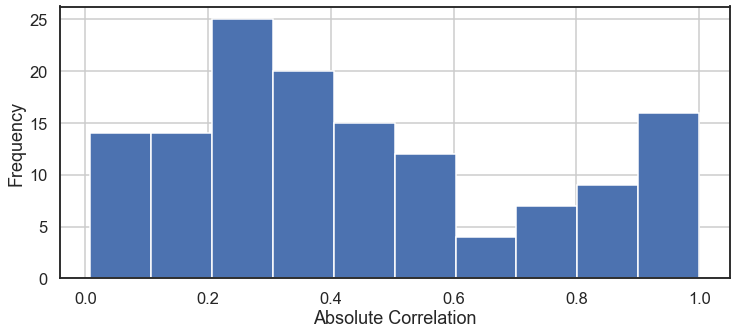

In [12]:
sns.set_context('talk')
sns.set_style('white')

ax = corr_values.abs_correlation.hist(bins=10, figsize=(12, 5))
ax.set(xlabel='Absolute Correlation', ylabel='Frequency');

# The most highly correlated values
corr_values.sort_values('abs_correlation', ascending=False).query('abs_correlation>0.8')

From this correlation analysis we can see that:
1. .

Before continuing, we will scale our X columns to values between zero and one.

In [13]:
float_columns = [x for x in dataset.columns if x not in ['Class']]

skew_columns = (dataset[float_columns].skew().sort_values(ascending=False))
skew_columns = skew_columns.loc[skew_columns > 0.5]
skew_columns

Area               2.952931
ConvexArea         2.941821
MinorAxisLength    2.238211
EquivDiameter      1.948958
MajorAxisLength    1.357815
AspectRation       0.582573
dtype: float64

In [14]:
from sklearn.preprocessing import StandardScaler

for col in skew_columns.index.tolist():
    dataset[col] = np.log1p(dataset[col])

sc = StandardScaler()
dataset[float_columns] = sc.fit_transform(dataset[float_columns])

In [16]:
from scipy.stats import yeojohnson

# Apply transformation to long-tailed columns
yeoj = dict()
yeoj_fields = ['ShapeFactor4', 'Solidity', 'Eccentricity', 'roundness']
for f in yeoj_fields:
    yeoj[f] = yeojohnson(dataset[f])
    dataset[f] = yeoj[f][0]
    print("{0} transformed with lambda {1}".format(f, yeoj[f][1]))

ShapeFactor4 transformed with lambda 1.126194090837411
Solidity transformed with lambda 1.0150774431045169
Eccentricity transformed with lambda 1.000001620608869
roundness transformed with lambda 1.3939490770461203


In [ ]:
# %matplotlib inline
# plt.close()
# sns.set_style('whitegrid')
# sns.pairplot(dataset, hue='Class', height=3)
# plt.show()

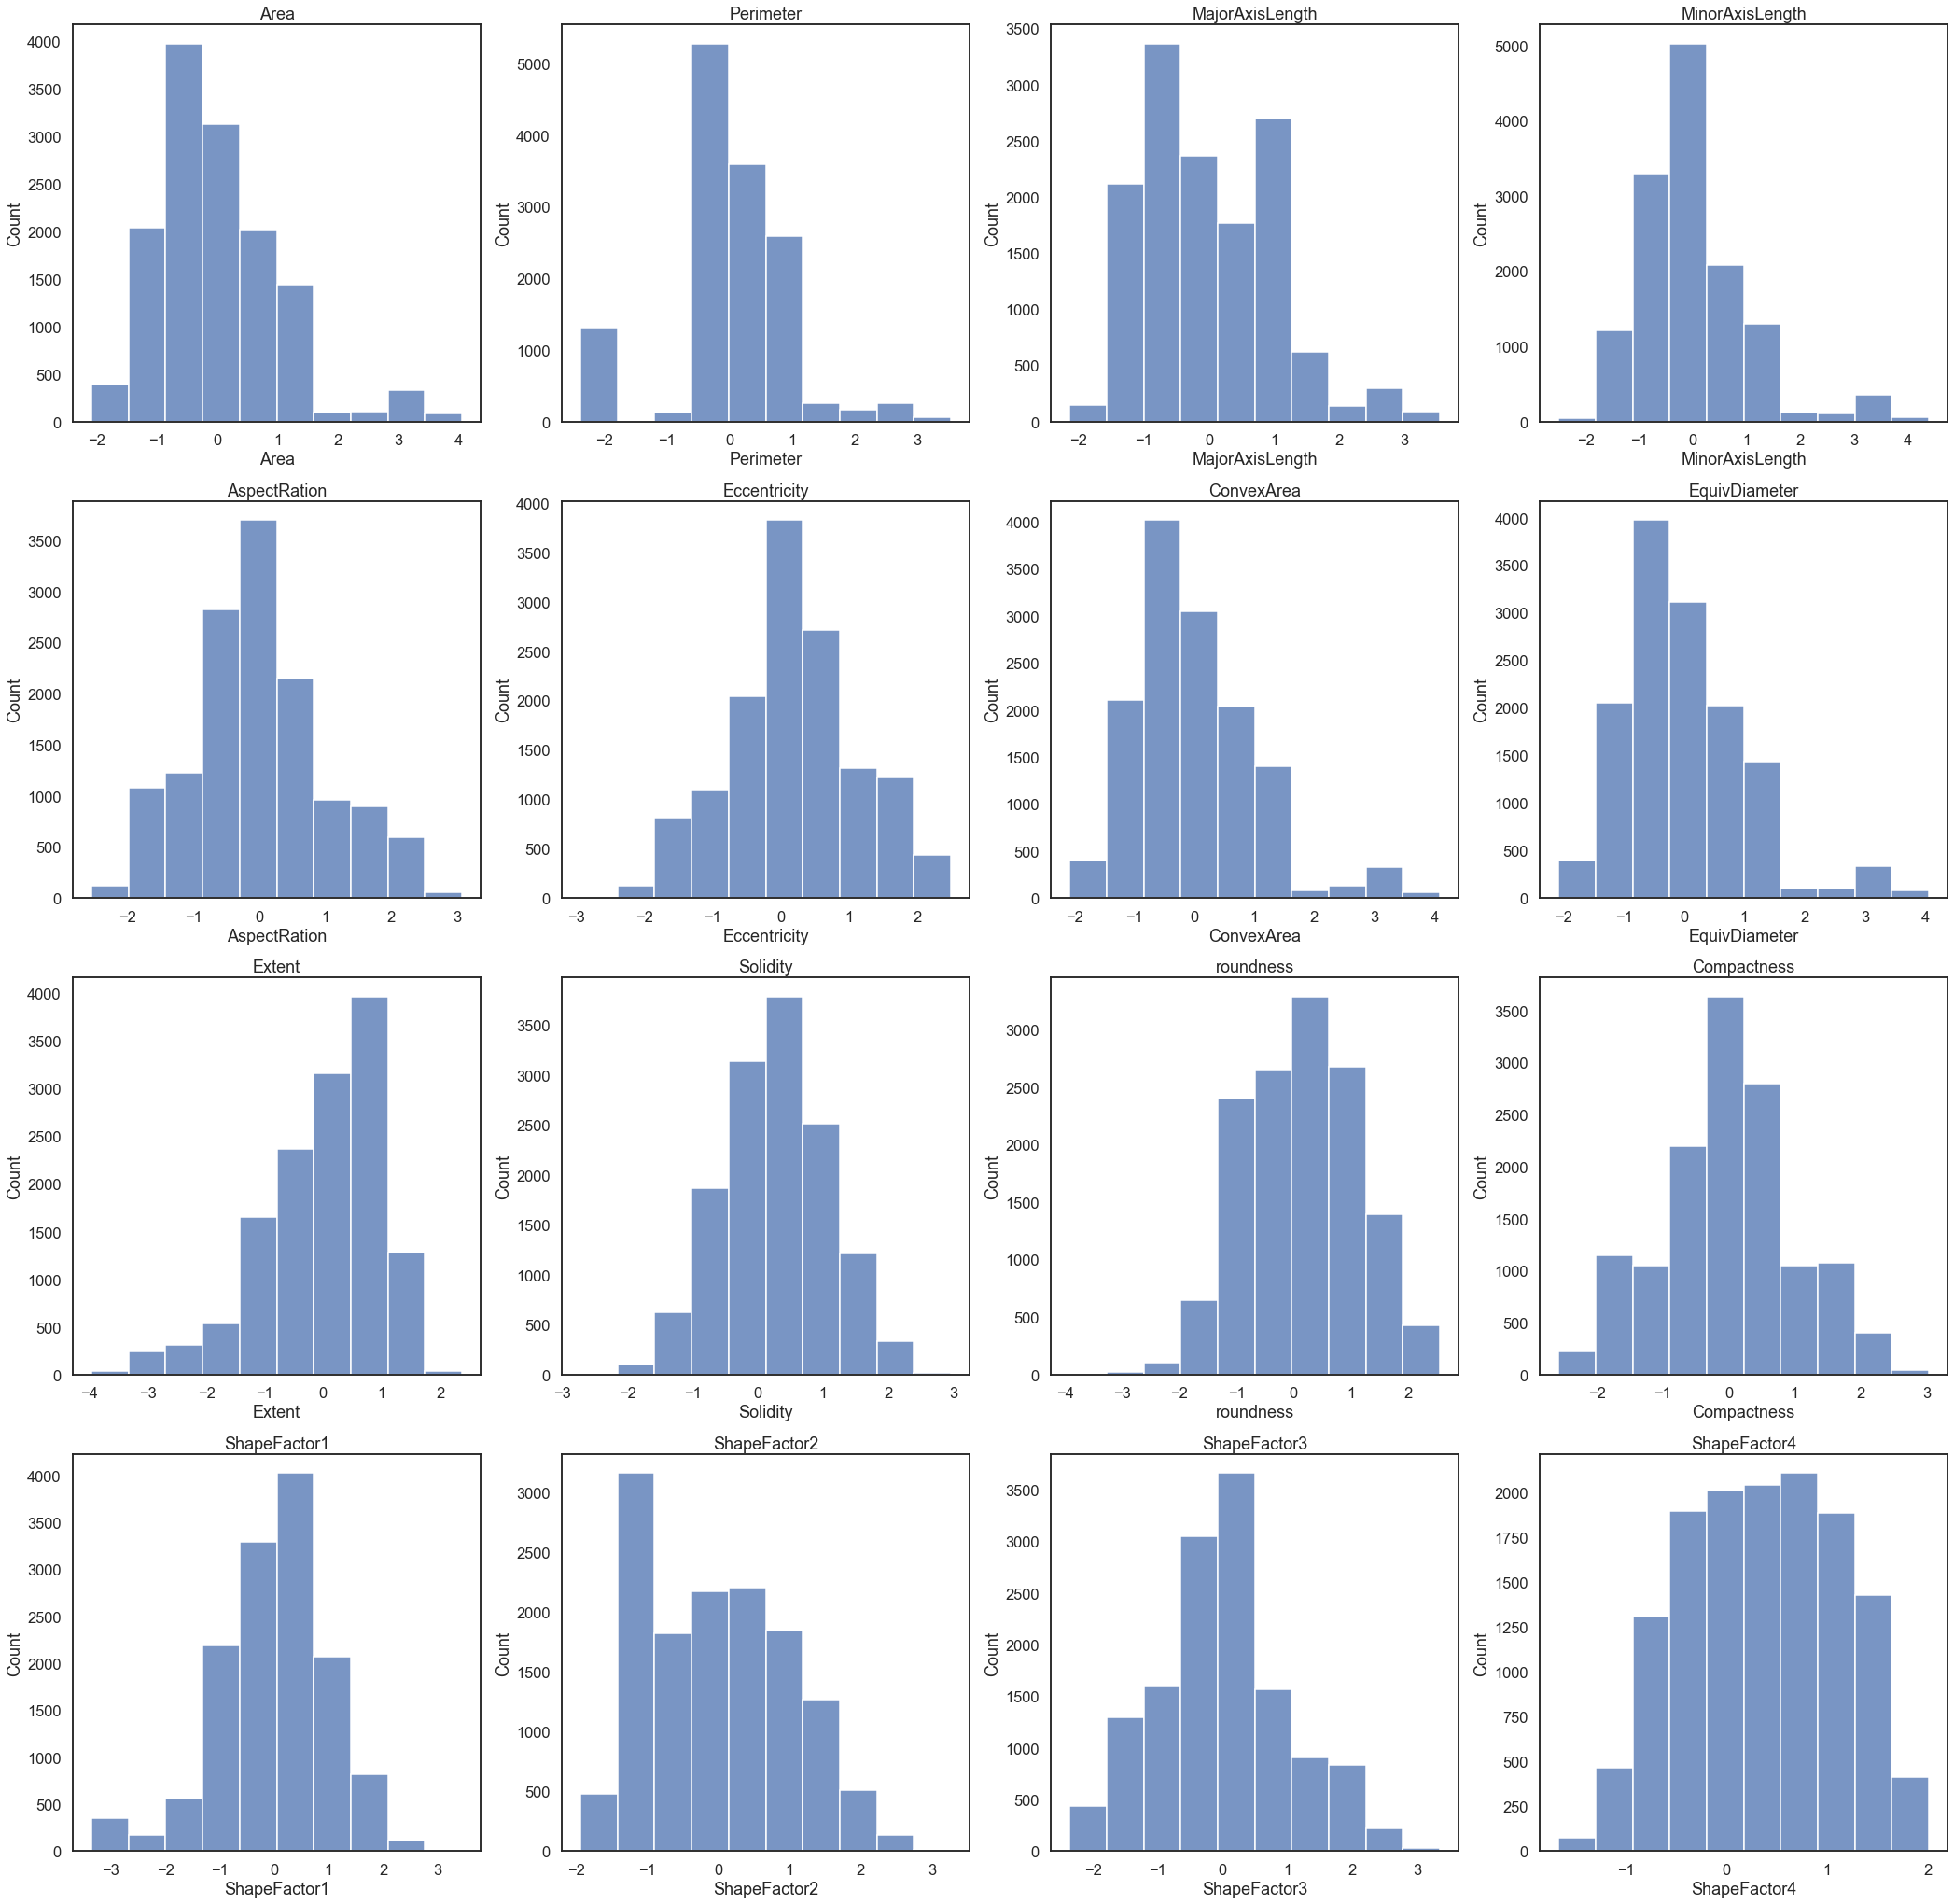

In [17]:
fig, ax_list = plt.subplots(nrows=4, ncols=4, sharey=False, figsize=(36,36))
ax_list = ax_list.flatten()
for name, ax in zip(feature_cols, ax_list):
     g = sns.histplot(dataset, x=name, bins=10, ax=ax).set(title=name)

In [18]:
dataset

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,-1.281157,-0.502111,-1.626115,-0.683706,-1.677228,-1.489865,-1.281561,-1.280395,0.289087,0.436310,1.747170,1.839116,0.680786,2.402173,1.925723,1.398343,5
1,-1.252264,-0.416500,-1.778667,-0.425194,-2.172699,-2.168822,-1.243234,-1.251545,0.697477,-0.379579,0.241120,2.495449,0.367967,3.100893,2.689702,1.240446,5
2,-1.198136,-2.384537,-1.536168,-0.622875,-1.616681,-1.417470,-1.200512,-1.197496,0.578195,0.655207,1.508218,1.764843,0.603129,2.235091,1.841356,1.593612,5
3,-1.146644,-0.392213,-1.579813,-0.431411,-1.890551,-1.759898,-1.117416,-1.146077,0.671260,-1.169571,0.562757,2.081715,0.401718,2.515075,2.204250,-0.174414,5
4,-1.135959,-0.471719,-1.751884,-0.214349,-2.360057,-2.497262,-1.141792,-1.135406,0.476020,1.135157,2.409192,2.765330,0.118268,3.270983,3.013462,1.652932,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,-0.322503,-0.040803,-0.292960,-0.334442,-0.079193,0.160056,-0.329392,-0.322740,-0.716284,0.922736,0.820174,0.032433,0.261425,0.055630,-0.006086,1.216969,3
13607,-0.322271,-0.047587,-0.395163,-0.202479,-0.402469,-0.157820,-0.330192,-0.322509,1.022933,1.080219,0.934128,0.362794,0.110384,0.285117,0.328393,1.131976,3
13608,-0.320075,-0.041961,-0.395691,-0.189518,-0.419080,-0.174030,-0.325912,-0.320314,-0.403392,0.769474,0.858257,0.370533,0.104269,0.289204,0.336328,0.503835,3
13609,-0.319613,-0.028196,-0.369085,-0.214446,-0.347168,-0.103802,-0.320330,-0.319852,-0.903414,0.154196,0.641998,0.285098,0.141906,0.228375,0.248973,0.037375,3


## 4. Classification models

### 4.1. K-means clustering model
- Fit a K-means clustering model with seven clusters, one per class.
- Examine the clusters by counting each class in each cluster.

In [22]:
from sklearn.cluster import KMeans

feature_columns = dataset.columns.tolist()[:-1]
km = KMeans(n_clusters=7, random_state=42)
km = km.fit(dataset[feature_columns])

dataset['kmeans'] = km.predict(dataset[feature_columns])

In [24]:
method = 'kmeans'

(dataset[['Class', method]]
 .groupby([method, 'Class'])
 .size()
 .to_frame()
 .rename(columns={0: 'number'}))

number
kmeans Class        
0      0          14
       2           2
       3         126
       5        1897
       6          23
1      0          12
       2          75
       3           4
       4         843
       6          50
2      3        2758
       4           4
       5          15
       6          92
3      0           9
       2          22
       3           3
       4        1022
       6          67
4      0         116
       2          18
       3         655
       4          37
       5         115
       6        2389
5      0           1
       1         521
       2           2
6      0        1170
       1           1
       2        1511
       4          22
       6          15

Clusters 6 and 4 are where classes get most confused, having no prevailing class.

### 4.2. Agglomerative clustering model
- Fit an agglomerative clustering model with seven clusters, one per class.
- Examine the clusters by counting the number of red and white wines in each cluster.

In [26]:
from sklearn.cluster import AgglomerativeClustering

ag = AgglomerativeClustering(n_clusters=7, linkage='ward', compute_full_tree=True)
ag = ag.fit(dataset[feature_columns])
dataset['agglom'] = ag.fit_predict(dataset[feature_columns])

In [28]:
method = 'agglom'
(dataset[['Class', method]]
 .groupby([method, 'Class'])
 .size()
 .to_frame()
 .rename(columns={0: 'number'}))

number
agglom Class        
0      0          13
       2           5
       3        3300
       4          13
       5         432
       6         598
1      0        1083
       2        1397
       4          46
       5           4
       6           6
2      0           8
       2          39
       3           1
       4        1582
       6          14
3      2           1
       3          31
       5        1556
       6           4
4      1         522
5      0          86
       2          21
       3         214
       4         109
       5          33
       6        2006
6      0         132
       2         167
       4         178
       5           2
       6           8

Clusters 1 and 6 have no prevailing class, so identification remains incomplete.

### 4.3. PCA

In [31]:
from sklearn.decomposition import PCA

pca_list = list()
feature_weight_list = list()

# Fit a range of PCA models

for n in range(1, 8):
    
    # Create and fit the model
    PCAmod = PCA(n_components=n)
    PCAmod.fit(dataset)
    
    # Store the model and variance
    pca_list.append(pd.Series({'n':n, 'model':PCAmod,
                               'var': PCAmod.explained_variance_ratio_.sum()}))
    
    # Calculate and store feature importances
    abs_feature_values = np.abs(PCAmod.components_).sum(axis=0)
    feature_weight_list.append(pd.DataFrame({'n':n, 
                                             'features': dataset.columns,
                                             'values':abs_feature_values/abs_feature_values.sum()}))
    
pca_df = pd.concat(pca_list, axis=1).T.set_index('n')
pca_df

,model,var
n,,
1,PCA(n_components=1),0.449731
2,PCA(n_components=2),0.638672
3,PCA(n_components=3),0.797409
4,PCA(n_components=4),0.865279
5,PCA(n_components=5),0.911802
6,PCA(n_components=6),0.943034
7,PCA(n_components=7),0.966034


In [32]:
features_df = (pd.concat(feature_weight_list)
               .pivot(index='n', columns='features', values='values'))

features_df

features,Area,AspectRation,Class,Compactness,ConvexArea,Eccentricity,EquivDiameter,Extent,MajorAxisLength,MinorAxisLength,Perimeter,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Solidity,agglom,kmeans,roundness
n,,,,,,,,,,,,,,,,,,,
1,0.064201,0.044511,0.075015,0.046573,0.064361,0.042998,0.064197,0.011381,0.068267,0.051130,0.040116,0.049701,0.065693,0.047259,0.035589,0.026305,0.030344,0.118577,0.053783
2,0.049776,0.038371,0.136120,0.038309,0.049754,0.035608,0.049761,0.013083,0.053914,0.038384,0.030629,0.039820,0.052871,0.037875,0.028813,0.025471,0.150387,0.096089,0.034966
3,0.046560,0.059580,0.101876,0.059123,0.046405,0.055019,0.046558,0.029969,0.035223,0.054892,0.027603,0.056070,0.048265,0.058617,0.028698,0.025473,0.110559,0.066093,0.043417
4,0.050670,0.055853,0.080516,0.052536,0.050417,0.049290,0.050672,0.028624,0.042393,0.054579,0.037282,0.054141,0.045457,0.050473,0.023092,0.029087,0.099277,0.111077,0.034562
5,0.046954,0.047204,0.111309,0.043734,0.046588,0.041083,0.046952,0.028332,0.039056,0.050854,0.047840,0.051935,0.041086,0.041743,0.020530,0.035004,0.111178,0.111003,0.037617
6,0.042541,0.046736,0.099739,0.044608,0.042343,0.041930,0.042538,0.075343,0.034724,0.048443,0.053094,0.049709,0.040089,0.043425,0.019197,0.039127,0.099340,0.100623,0.036453
7,0.039748,0.044358,0.089730,0.041820,0.039158,0.039900,0.039745,0.077538,0.033620,0.043072,0.068936,0.044930,0.038741,0.040838,0.033212,0.064004,0.086831,0.090894,0.042922


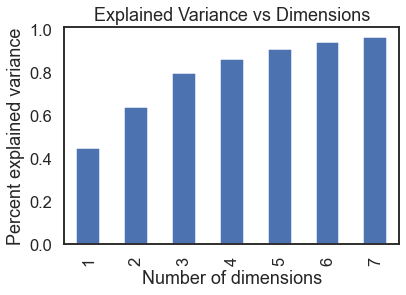

In [34]:
sns.set_context('talk')
ax = pca_df['var'].plot(kind='bar')

ax.set(xlabel='Number of dimensions',
       ylabel='Percent explained variance',
       title='Explained Variance vs Dimensions');

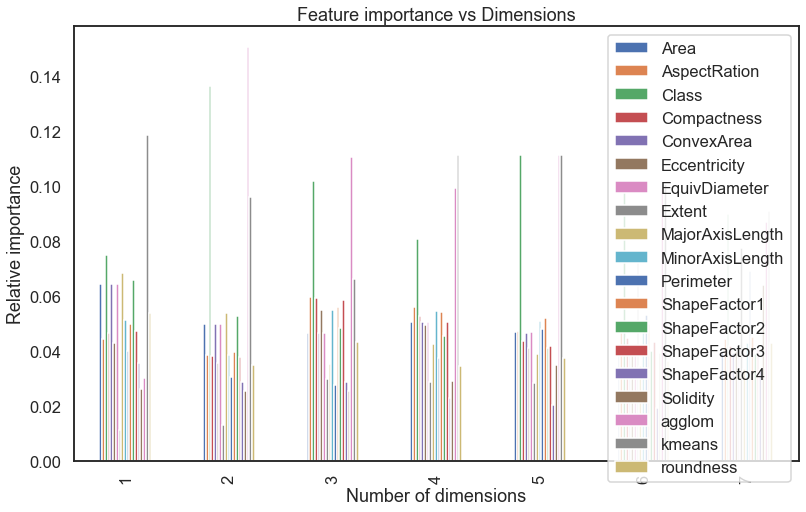

In [35]:
ax = features_df.plot(kind='bar', figsize=(13,8))
ax.legend(loc='upper right')
ax.set(xlabel='Number of dimensions',
       ylabel='Relative importance',
       title='Feature importance vs Dimensions');

In [37]:
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Custom scorer--use negative rmse of inverse transform
def scorer(pcamodel, X, y=None):

    try:
        X_val = X.values
    except:
        X_val = X
        
    # Calculate and inverse transform the data
    data_inv = pcamodel.fit(X_val).transform(X_val)
    data_inv = pcamodel.inverse_transform(data_inv)
    
    # The error calculation
    mse = mean_squared_error(data_inv.ravel(), X_val.ravel())
    
    # Larger values are better for scorers, so take negative value
    return -1.0 * mse

# The grid search parameters
param_grid = {'gamma':[0.001, 0.01, 0.05, 0.1, 0.5, 1.0],
              'n_components': [2, 3, 4]}

# The grid search
kernelPCA = GridSearchCV(KernelPCA(kernel='rbf', fit_inverse_transform=True),
                         param_grid=param_grid,
                         scoring=scorer,
                         n_jobs=-1)


kernelPCA = kernelPCA.fit(dataset)

kernelPCA.best_estimator_

KernelPCA(fit_inverse_transform=True, gamma=0.001, kernel='rbf', n_components=2)

In [40]:
kernelPCA

GridSearchCV(estimator=KernelPCA(fit_inverse_transform=True, kernel='rbf'),
             n_jobs=-1,
             param_grid={'gamma': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0],
                         'n_components': [2, 3, 4]},
             scoring=<function scorer at 0x0000025A3735D040>)